In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)



In [3]:
df = pd.read_csv("weightdata.csv")


In [15]:
df.head()

,Index,Weight
0,1,112.9925
1,2,136.4873
2,3,153.0269
3,4,142.3354
4,5,144.2971


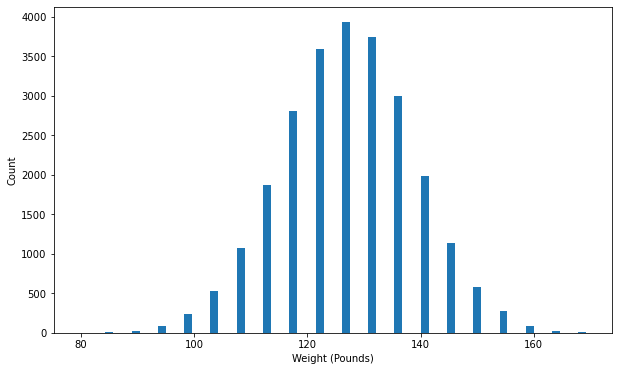

In [22]:
plt.hist(df.Weight, bins=20, rwidth=0.3)
plt.xlabel('Weight (Pounds)')
plt.ylabel('Count')
plt.show()


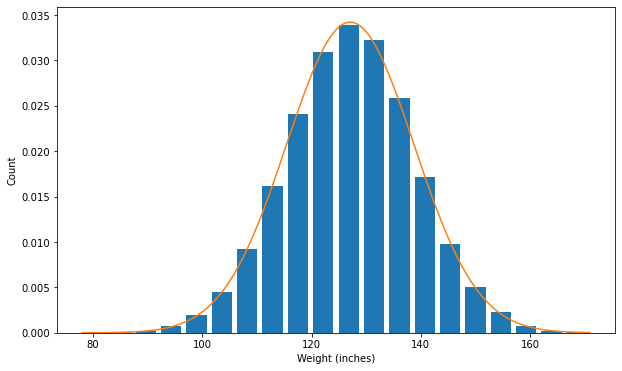

In [23]:
from scipy.stats import norm
import numpy as np
plt.hist(df.Weight, bins=20, rwidth=0.8, density=True)
plt.xlabel('Weight (inches)')
plt.ylabel('Count')

rng = np.arange(df.Weight.min(), df.Weight.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.Weight.mean(),df.Weight.std()))

In [25]:
df.Weight.mean()


127.07942116079916

In [26]:
df.Weight.std()


11.660897563604287

In [27]:
upper_limit = df.Weight.mean() + 3*df.Weight.std()
upper_limit


162.06211385161203

In [28]:
lower_limit = df.Weight.mean() -3*df.Weight.std()
lower_limit


92.09672846998629

In [29]:
df[(df.Weight>upper_limit) | (df.Weight<lower_limit)]


,Index,Weight
249,250,84.35980
367,368,168.22900
446,447,162.41090
727,728,83.08527
1332,1333,162.87370
...,...,...
21101,21102,85.98927
22282,22283,91.37972
22738,22739,87.80417
22945,22946,78.01476


In [30]:
df_no_outlier_std_dev = df[(df.Weight<upper_limit) & (df.Weight>lower_limit)]
df_no_outlier_std_dev.head()


,Index,Weight
0,1,112.9925
1,2,136.4873
2,3,153.0269
3,4,142.3354
4,5,144.2971


In [31]:
df_no_outlier_std_dev.shape


(24931, 2)

In [32]:
df.shape

(25000, 2)

In [4]:
df.describe()

,Index,Weight
count,25000.000000,25000.000000
mean,12500.500000,127.079421
std,7217.022701,11.660898
min,1.000000,78.014760
25%,6250.750000,119.308675
50%,12500.500000,127.157750
75%,18750.250000,134.892850
max,25000.000000,170.924000


In [6]:
Q1 = df.Weight.quantile(0.25)
Q3 = df.Weight.quantile(0.75)
Q1, Q3

(119.308675, 134.89285)

In [7]:
IQR = Q3 - Q1
IQR


15.584175000000016

In [8]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit


(95.93241249999997, 158.26911250000003)

In [9]:
df[(df.Weight<lower_limit)|(df.Weight>upper_limit)]


,Index,Weight
156,157,158.95620
249,250,84.35980
293,294,92.74955
367,368,168.22900
446,447,162.41090
...,...,...
24187,24188,161.85040
24610,24611,82.38298
24750,24751,159.63440
24835,24836,94.40946


In [11]:
df_no_outlier = df[(df.Weight>lower_limit)&(df.Weight<upper_limit)]
df_no_outlier


,Index,Weight
0,1,112.9925
1,2,136.4873
2,3,153.0269
3,4,142.3354
4,5,144.2971
...,...,...
24995,24996,118.0312
24996,24997,120.1932
24997,24998,118.2655
24998,24999,132.2682
